In [1]:
import pandas as pd 
import numpy  as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('data/StudentsPerformance.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

check missing values

In [5]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

duplicate

In [6]:
df.duplicated().sum()

0

check datatypes

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


checking yje Unique values of each column

In [8]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

check the statistics of dataset


In [9]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


exploring data

In [10]:
print("categories in 'gender'  variable: ",end='')
print(df['gender'].unique())
print("categories in 'race/ethnicity'  variable: ",end='')
print(df['race/ethnicity'].unique())
print("categories in 'parental level of education'  variable: ",end='')
print(df['parental level of education'].unique())
print("categories in 'lunch'  variable: ",end='')
print(df['lunch'].unique())
print("categories in 'test preparation course'  variable: ",end='')
print(df['test preparation course'].unique())



categories in 'gender'  variable: ['female' 'male']
categories in 'race/ethnicity'  variable: ['group B' 'group C' 'group A' 'group D' 'group E']
categories in 'parental level of education'  variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in 'lunch'  variable: ['standard' 'free/reduced']
categories in 'test preparation course'  variable: ['none' 'completed']


In [12]:
#define numerical and categorical values
numeric_features=[feature for feature in df.columns if df[feature].dtype!='0']
categorical_features=[feature for feature in df.columns if df[feature].dtype=='0']

#print columns
print("we have {} numerical features : {}".format(len(numeric_features),numeric_features))
print("\nwe have {} categorical features : {}".format(len(categorical_features),categorical_features))

we have 8 numerical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score']

we have 0 categorical features : []


adding columns for "total score" and "average score"


In [13]:
df['total score']=df['math score'] + df['reading score'] + df['writing score']
df['average score']=df['total score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [14]:
reading_full=df[df['reading score']==100]['average score'].count()
writing_full=df[df['writing score']==100]['average score'].count()
math_full=df[df['math score']==100]['average score'].count()

print("the number of students with full marks in maths:{math_full}")
print("the number of students with full marks in reading:{reading_full}")
print("the number of students with full marks in writing:{writing_full}")

the number of students with full marks in maths:{math_full}
the number of students with full marks in reading:{reading_full}
the number of students with full marks in writing:{writing_full}


In [15]:
reading_less_20 =df[df['reading score'] <= 20]['average score'].count()
print("the number students with les  than 20 marks is : {reading_less_20}")

the number students with les  than 20 marks is : {reading_less_20}


Histogram and KDE


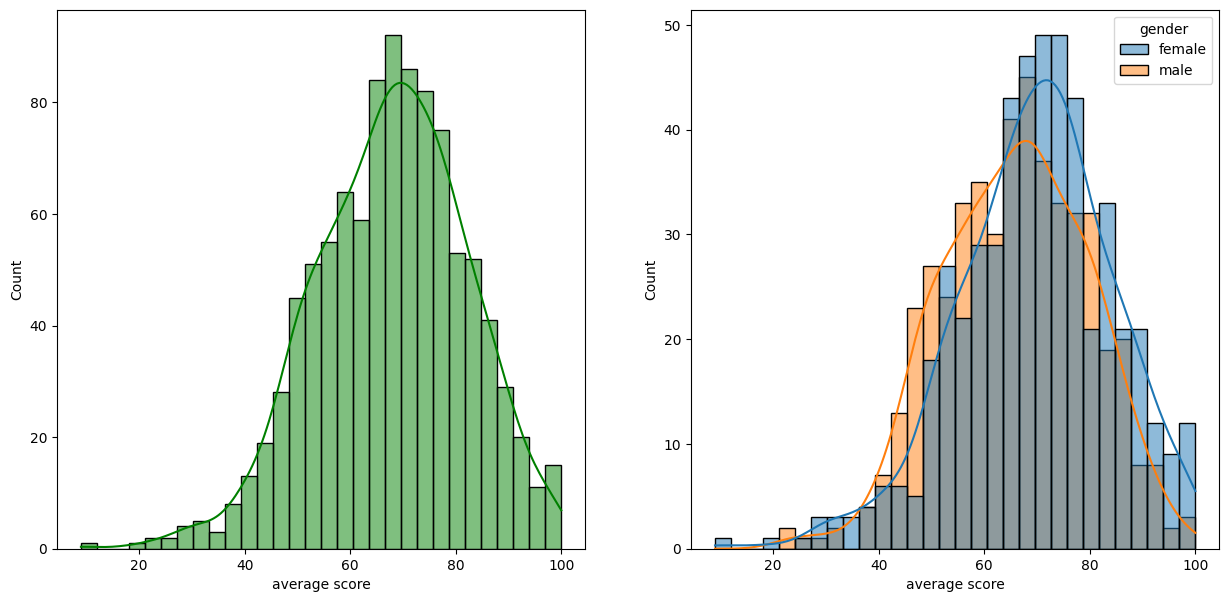

In [16]:
fig, axs = plt.subplots(1,2, figsize =(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average score',bins=30,kde=True,hue='gender')
plt.show()

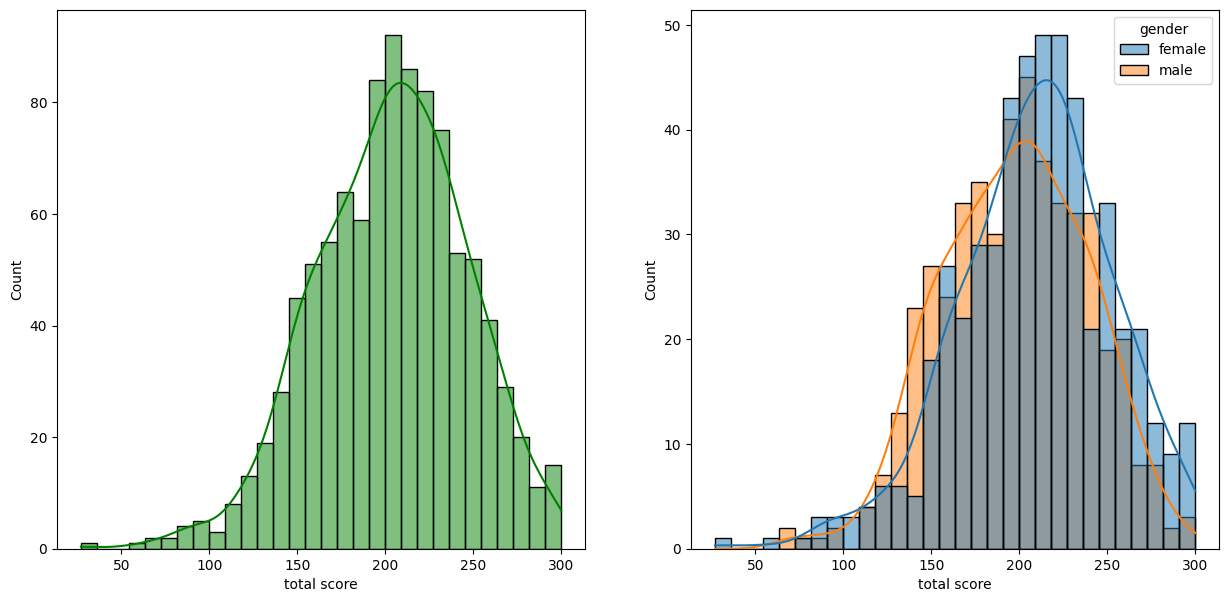

In [17]:
fig, axs = plt.subplots(1,2, figsize =(15,7))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total score',bins=30,kde=True,hue='gender')
plt.show()

hfhfhfhf